# TASK-2: TITANIC CLASSIFICATION

Author: Shaik.Zohaib

Domain: Data Science

Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


Importing the Dataset

In [21]:
# Import the dataset from "tested.csv"
df = pd.read_csv("tested.csv")
df.head(10)
df.shape
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

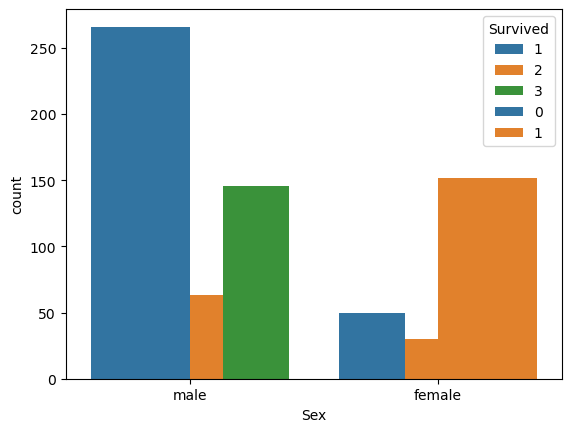

In [22]:
df['Survived'].value_counts()
sns.countplot(x=df['Survived'], hue=df['Pclass'])
sns.countplot(x=df['Sex'], hue=df['Survived'])

Data Pre-processing

In [23]:
# Encode 'Sex' column using LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
# Select features and target variable
X = df[['Pclass', 'Sex']]
Y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a Logistic Regression model
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)


LogisticRegression(random_state=0)

<Axes: xlabel='Sex', ylabel='count'>

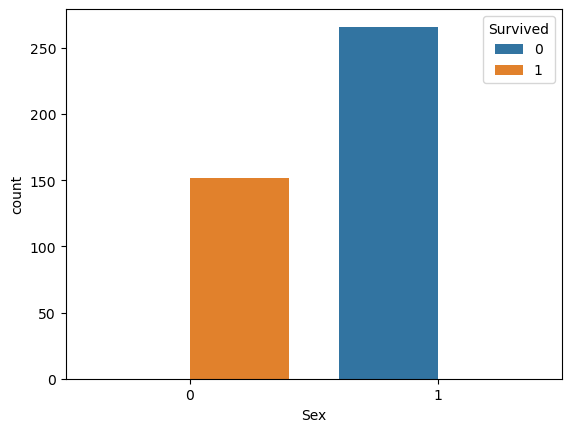

In [12]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [26]:
pred = print(log.predict(X_test))
print(Y_test)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]
360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [19]:
# Sample prediction
res = log.predict([[2, 1]])
if res == 0:
    print("So Sorry! Not Survived")
else:
    print("Survived")


So Sorry! Not Survived
